In [13]:
# CoinMarketCap API 

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [14]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [16]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc=True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9617,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.908742e+07,1.908742e+07,NaN,1,NaN,NaN,None,2022-07-07T12:20:00.000Z,20490.250812,2.180805e+10,-22.6489,0.060485,2.312331,7.322071,-30.540042,-41.100813,-52.739812,3.911061e+11,42.4169,4.302953e+11,None,2022-07-07T12:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-07 12:21:10.677808+00:00
1,1027,Ethereum,ETH,ethereum,5815,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.214482e+08,1.214482e+08,NaN,2,NaN,NaN,None,2022-07-07T12:19:00.000Z,1187.086762,1.316493e+10,-20.8021,0.442307,5.125189,16.539628,-32.243459,-53.885374,-63.584848,1.441695e+11,15.6250,1.441695e+11,None,2022-07-07T12:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-07 12:21:10.677808+00:00
2,825,Tether,USDT,tether,35848,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.599428e+10,6.816037e+10,NaN,3,NaN,NaN,None,2022-07-07T12:19:00.000Z,0.999254,3.772531e+10,-20.0024,0.004921,0.022780,0.040314,-0.011220,-0.064166,-0.098042,6.594508e+10,7.1520,6.810955e+10,None,2022-07-07T12:19:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-07 12:21:10.677808+00:00
3,3408,USD Coin,USDC,usd-coin,4779,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.554694e+10,5.554694e+10,NaN,4,NaN,NaN,None,2022-07-07T12:19:00.000Z,1.000258,5.053485e+09,-8.0814,-0.002666,-0.009887,0.015072,0.005150,0.009567,0.091216,5.556125e+10,6.0273,5.556125e+10,None,2022-07-07T12:19:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-07 12:21:10.677808+00:00
4,1839,BNB,BNB,bnb,994,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,None,2022-07-07T12:19:00.000Z,237.855036,1.011643e+09,-25.1742,0.297726,0.798147,14.020172,-14.005385,-33.520728,-44.463977,3.883625e+10,4.2130,3.927385e+10,None,2022-07-07T12:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-07 12:21:10.677808+00:00
5,4687,Binance USD,BUSD,binance-usd,4015,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.754722e+10,1.754722e+10,NaN,6,NaN,NaN,None,2022-07-07T12:20:00.000Z,1.001636,4.729356e+09,-2.2716,0.127897,0.104078,0.240220,0.169384,0.113765,0.287678,1.757593e+10,1.9054,1.757593e+10,None,2022-07-07T12:20:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-07-07 12:21:10.677808+00:00
6,52,XRP,XRP,xrp,755,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,7,NaN,NaN,None,2022-07-07T12:20:00.000Z,0.329657,9.955397e+08,-11.7335,0.194370,2.378777,6.346588,-15.325017,-42.733261,-57.327578,1.593663e+10,1.7272,3.296568e+10,None,2022-07-07T12:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-07 12:21:10.677808+00:00
7,2010,Cardano,ADA,cardano,515,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.393405e+10,3.427770e+10,NaN,8,NaN,NaN,None,2022-07-07T12:19:00.000Z,0.466686,5.404054e+08,-25.2280,0.337949,2.622746,6.022344,-20.086675,-37.626243,-56.465882,1.583655e+10,1.7164,2.100088e+10,None,2022-07-07T12:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-07 12:21:10.677808+00:00
8,5426,Solana,SOL,solana,347,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdin

In [18]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    # to get the data in the dataframe
    # df2 = pd.json_normalize(data['data'])
    # df2['Timestamp'] = pd.to_datetime('now')
    # df = df.append(df2)
    
    # to append to a csv file
    if not os.path.isfile(r'/Users/joostdolstra/Documents/Data science/Python Data/cryptoapi.csv'):
        df.to_csv(r'/Users/joostdolstra/Documents/Data science/Python Data/cryptoapi.csv', header='column_names')
    else:
        df.to_csv(r'/Users/joostdolstra/Documents/Data science/Python Data/cryptoapi.csv', mode='a',header=False)

In [19]:
import os
from time import time
from time import sleep

for i in range(300):
    api_runner()
    print('API Runner Completed')
    sleep(60)
exit()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arrays/datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/var/folders/pc/p4klhm3108xcc7nwfzhljxdm0000gn/T/ipykernel_4105/2829764064.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner Completed


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arrays/datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/var/folders/pc/p4klhm3108xcc7nwfzhljxdm0000gn/T/ipykernel_4105/2829764064.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner Completed


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arrays/datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/var/folders/pc/p4klhm3108xcc7nwfzhljxdm0000gn/T/ipykernel_4105/2829764064.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner Completed


KeyboardInterrupt: 

In [20]:
df72 = pd.read_csv(r'/Users/joostdolstra/Documents/Data science/Python Data/cryptoapi.csv')
df72 

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,9617,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.908742e+07,1.908742e+07,NaN,1,NaN,NaN,NaN,2022-07-07T12:20:00.000Z,20490.250812,2.180805e+10,-22.6489,0.060485,2.312331,7.322071,-30.540042,-41.100813,-52.739812,3.911061e+11,42.4169,4.302953e+11,NaN,2022-07-07T12:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-07 12:21:10.677808+00:00,NaN
1,1,1027,Ethereum,ETH,ethereum,5815,2015-08-07T00:00:00.000Z,"['mineable', 'pow', 'smart-contracts', 'ethere...",NaN,1.214482e+08,1.214482e+08,NaN,2,NaN,NaN,NaN,2022-07-07T12:19:00.000Z,1187.086762,1.316493e+10,-20.8021,0.442307,5.125189,16.539628,-32.243459,-53.885374,-63.584848,1.441695e+11,15.6250,1.441695e+11,NaN,2022-07-07T12:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-07 12:21:10.677808+00:00,NaN
2,2,825,Tether,USDT,tether,35848,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,6.599428e+10,6.816037e+10,NaN,3,NaN,NaN,NaN,2022-07-07T12:19:00.000Z,0.999254,3.772531e+10,-20.0024,0.004921,0.022780,0.040314,-0.011220,-0.064166,-0.098042,6.594508e+10,7.1520,6.810955e+10,NaN,2022-07-07T12:19:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-07 12:21:10.677808+00:00,NaN
3,3,3408,USD Coin,USDC,usd-coin,4779,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,5.554694e+10,5.554694e+10,NaN,4,NaN,NaN,NaN,2022-07-07T12:19:00.000Z,1.000258,5.053485e+09,-8.0814,-0.002666,-0.009887,0.015072,0.005150,0.009567,0.091216,5.556125e+10,6.0273,5.556125e+10,NaN,2022-07-07T12:19:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-07 12:21:10.677808+00:00,NaN
4,4,1839,BNB,BNB,bnb,994,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",1.651168e+08,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,NaN,2022-07-07T12:19:00.000Z,237.855036,1.011643e+09,-25.1742,0.297726,0.798147,14.020172,-14.005385,-33.520728,-44.463977,3.883625e+10,4.2130,3.927385e+10,NaN,2022-07-07T12:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-07 12:21:10.677808+00:00,NaN
5,5,4687,Binance USD,BUSD,binance-usd,4015,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,1.754722e+10,1.754722e+10,NaN,6,NaN,NaN,NaN,2022-07-07T12:20:00.000Z,1.001636,4.729356e+09,-2.2716,0.127897,0.104078,0.240220,0.169384,0.113765,0.287678,1.757593e+10,1.9054,1.757593e+10,NaN,2022-07-07T12:20:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-07-07 12:21:10.677808+00:00,NaN
6,6,52,XRP,XRP,xrp,755,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,7,NaN,NaN,NaN,2022-07-07T12:20:00.000Z,0.329657,9.955397e+08,-11.7335,0.194370,2.378777,6.346588,-15.325017,-42.733261,-57.327578,1.593663e+10,1.7272,3.296568e+10,NaN,2022-07-07T12:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-07 12:21:10.677808+00:00,NaN
7,7,2010,Cardano,ADA,cardano,515,2017-10-01T00:00:00.000Z,"['mineable', 'dpos', 'pos', 'platform', 'resea...",4.500000e+10,3.393405e+10,3.427770e+10,NaN,8,NaN,NaN,NaN,2022-07-07T12:19:00.000Z,0.466686,5.404054e+08,-25.2280,0.337949,2.622746,6.022344,-20.086675,-37.626243,-56.465882,1.583655e+10,1.7164,2.100088e+10,NaN,2022-07-07T12:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-07 12:21:10.677808+00:00,NaN
8,8,5426,Solana,SOL,solana,347,2020-04-10T00:0

In [21]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,9617,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.908742e+07,1.908742e+07,NaN,1,NaN,NaN,None,2022-07-07T12:20:00.000Z,20490.250812,2.180805e+10,-22.6489,0.060485,2.312331,7.322071,-30.540042,-41.100813,-52.739812,3.911061e+11,42.4169,4.302953e+11,None,2022-07-07T12:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-07 12:21:10.677808+00:00,NaT
1,1027,Ethereum,ETH,ethereum,5815,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.214482e+08,1.214482e+08,NaN,2,NaN,NaN,None,2022-07-07T12:19:00.000Z,1187.086762,1.316493e+10,-20.8021,0.442307,5.125189,16.539628,-32.243459,-53.885374,-63.584848,1.441695e+11,15.6250,1.441695e+11,None,2022-07-07T12:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-07 12:21:10.677808+00:00,NaT
2,825,Tether,USDT,tether,35848,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.599428e+10,6.816037e+10,NaN,3,NaN,NaN,None,2022-07-07T12:19:00.000Z,0.999254,3.772531e+10,-20.0024,0.004921,0.022780,0.040314,-0.011220,-0.064166,-0.098042,6.594508e+10,7.1520,6.810955e+10,None,2022-07-07T12:19:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-07 12:21:10.677808+00:00,NaT
3,3408,USD Coin,USDC,usd-coin,4779,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.554694e+10,5.554694e+10,NaN,4,NaN,NaN,None,2022-07-07T12:19:00.000Z,1.000258,5.053485e+09,-8.0814,-0.002666,-0.009887,0.015072,0.005150,0.009567,0.091216,5.556125e+10,6.0273,5.556125e+10,None,2022-07-07T12:19:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-07 12:21:10.677808+00:00,NaT
4,1839,BNB,BNB,bnb,994,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,None,2022-07-07T12:19:00.000Z,237.855036,1.011643e+09,-25.1742,0.297726,0.798147,14.020172,-14.005385,-33.520728,-44.463977,3.883625e+10,4.2130,3.927385e+10,None,2022-07-07T12:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-07 12:21:10.677808+00:00,NaT
5,4687,Binance USD,BUSD,binance-usd,4015,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.754722e+10,1.754722e+10,NaN,6,NaN,NaN,None,2022-07-07T12:20:00.000Z,1.001636,4.729356e+09,-2.2716,0.127897,0.104078,0.240220,0.169384,0.113765,0.287678,1.757593e+10,1.9054,1.757593e+10,None,2022-07-07T12:20:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-07-07 12:21:10.677808+00:00,NaT
6,52,XRP,XRP,xrp,755,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,7,NaN,NaN,None,2022-07-07T12:20:00.000Z,0.329657,9.955397e+08,-11.7335,0.194370,2.378777,6.346588,-15.325017,-42.733261,-57.327578,1.593663e+10,1.7272,3.296568e+10,None,2022-07-07T12:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-07 12:21:10.677808+00:00,NaT
7,2010,Cardano,ADA,cardano,515,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.393405e+10,3.427770e+10,NaN,8,NaN,NaN,None,2022-07-07T12:19:00.000Z,0.466686,5.404054e+08,-25.2280,0.337949,2.622746,6.022344,-20.086675,-37.626243,-56.465882,1.583655e+10,1.7164,2.100088e+10,None,2022-07-07T12:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-07 12:21:10.677808+00:00,NaT
8,5426,Solana,SOL,solana,347,2020-04-10T00:00:00.000Z,"[p

In [24]:
# to see whole numbers 
pd.set_option('display.float_format',lambda x: '%.5f' % x)

In [25]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,9617,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19087425.00000,19087425.00000,NaN,1,NaN,NaN,None,2022-07-07T12:20:00.000Z,20490.25081,21808048803.27840,-22.64890,0.06049,2.31233,7.32207,-30.54004,-41.10081,-52.73981,391106125599.97351,42.41690,430295267046.21002,None,2022-07-07T12:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-07 12:21:10.677808+00:00,NaT
1,1027,Ethereum,ETH,ethereum,5815,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121448183.43650,121448183.43650,NaN,2,NaN,NaN,None,2022-07-07T12:19:00.000Z,1187.08676,13164932095.95766,-20.80210,0.44231,5.12519,16.53963,-32.24346,-53.88537,-63.58485,144169530832.11926,15.62500,144169530832.12000,None,2022-07-07T12:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-07 12:21:10.677808+00:00,NaT
2,825,Tether,USDT,tether,35848,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,65994280060.84527,68160365339.22906,NaN,3,NaN,NaN,None,2022-07-07T12:19:00.000Z,0.99925,37725308723.75500,-20.00240,0.00492,0.02278,0.04031,-0.01122,-0.06417,-0.09804,65945079368.33862,7.15200,68109549765.92000,None,2022-07-07T12:19:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-07 12:21:10.677808+00:00,NaT
3,3408,USD Coin,USDC,usd-coin,4779,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,55546939563.00000,55546939563.00000,NaN,4,NaN,NaN,None,2022-07-07T12:19:00.000Z,1.00026,5053484847.09985,-8.08140,-0.00267,-0.00989,0.01507,0.00515,0.00957,0.09122,55561246147.66434,6.02730,55561246147.66000,None,2022-07-07T12:19:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-07 12:21:10.677808+00:00,NaT
4,1839,BNB,BNB,bnb,994,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.00000,163276974.63000,163276974.63000,NaN,5,NaN,NaN,None,2022-07-07T12:19:00.000Z,237.85504,1011643305.28359,-25.17420,0.29773,0.79815,14.02017,-14.00539,-33.52073,-44.46398,38836250669.92744,4.21300,39273852885.24000,None,2022-07-07T12:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-07 12:21:10.677808+00:00,NaT
5,4687,Binance USD,BUSD,binance-usd,4015,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,17547224379.45926,17547224379.45926,NaN,6,NaN,NaN,None,2022-07-07T12:20:00.000Z,1.00164,4729356256.97189,-2.27160,0.12790,0.10408,0.24022,0.16938,0.11376,0.28768,17575928548.84229,1.90540,17575928548.84000,None,2022-07-07T12:20:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-07-07 12:21:10.677808+00:00,NaT
6,52,XRP,XRP,xrp,755,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,7,NaN,NaN,None,2022-07-07T12:20:00.000Z,0.32966,995539731.41523,-11.73350,0.19437,2.37878,6.34659,-15.32502,-42.73326,-57.32758,15936630827.45501,1.72720,32965677486.25000,None,2022-07-07T12:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-07 12:21:10.677808+00:00,NaT
7,2010,Cardano,ADA,cardano,515,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33934048405.59300,34277702081.60500,NaN,8,NaN,NaN,None,2022-07-07T12:19:00.000Z,0.46669,540405365.91859,-25.22800,0.33795,2.62275,6.02234,-20.08667,-37.62624,-56.46588,15836552824.50192

In [26]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.11963,1.74012,6.98068,-30.65486,-41.15096,-52.86218
Ethereum,0.19020,4.47518,15.95232,-32.35139,-53.94629,-63.70432
Tether,0.00168,0.01688,0.03650,-0.01091,-0.06976,-0.10088
USD Coin,-0.02317,-0.01743,-0.00504,-0.01124,0.00206,0.04833
BNB,0.05793,0.24939,13.47526,-14.20432,-33.61282,-44.65250
Binance USD,0.08818,0.04841,0.07880,0.15289,0.09018,0.14896
XRP,0.16572,2.00773,6.05261,-15.41644,-42.74059,-57.40667
Cardano,0.07251,2.08036,5.50783,-20.23905,-37.59668,-56.62513
Solana,0.29990,3.96958,17.14848,-1.82558,-52.94713,-67.91339


In [27]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.11963
              quote.USD.percent_change_24h     1.74012
              quote.USD.percent_change_7d      6.98068
              quote.USD.percent_change_30d   -30.65486
              quote.USD.percent_change_60d   -41.15096
              quote.USD.percent_change_90d   -52.86218
Ethereum      quote.USD.percent_change_1h      0.19020
              quote.USD.percent_change_24h     4.47518
              quote.USD.percent_change_7d     15.95232
              quote.USD.percent_change_30d   -32.35139
              quote.USD.percent_change_60d   -53.94629
              quote.USD.percent_change_90d   -63.70432
Tether        quote.USD.percent_change_1h      0.00168
              quote.USD.percent_change_24h     0.01688
              quote.USD.percent_change_7d      0.03650
              quote.USD.percent_change_30d    -0.01091
              quote.USD.percent_change_60d    -0.06976
              quote.US

In [29]:
df5=df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.11963
             quote.USD.percent_change_24h   1.74012
             quote.USD.percent_change_7d    6.98068
             quote.USD.percent_change_30d -30.65486
             quote.USD.percent_change_60d -41.15096
             quote.USD.percent_change_90d -52.86218
Ethereum     quote.USD.percent_change_1h    0.19020
             quote.USD.percent_change_24h   4.47518
             quote.USD.percent_change_7d   15.95232
             quote.USD.percent_change_30d -32.35139
             quote.USD.percent_change_60d -53.94629
             quote.USD.percent_change_90d -63.70432
Tether       quote.USD.percent_change_1h    0.00168
             quote.USD.percent_change_24h   0.01688
             quote.USD.percent_change_7d    0.03650
             quote.USD.percent_change_30d  -0.01091
             quote.USD.percent_change_60d  -0.06976
             quote.USD.percent_change_90d  -0.10088
USD Coin     quote.USD.percent_change_1h   -0.02317
             quote.USD.percent_change_24h  -0.01743
             quote.USD.percent_change_7d   -0.00504
             quote.USD.percent_change_30d  -0.01124
             quote.USD.percent_change_60d   0.00206
             quote.USD.percent_change_90d   0.04833
BNB          quote.USD.percent_change_1h    0.05793
             quote.USD.percent_change_24h   0.24939
             quote.USD.percent_change_7d   13.47526
             quote.USD.percent_change_30d -14.20432
             quote.USD.percent_change_60d -33.61282
             quote.USD.percent_change_90d -44.65250
Binance USD  quote.USD.percent_change_1h    0.08818
             quote.USD.percent_change_24h   0.04841
             quote.USD.percent_change_7d    0.07880
             quote.USD.percent_change_30d   0.15289
             quote.USD.percent_change_60d   0.09018
             quote.USD.percent_change_90d   0.14896
XRP          quote.USD.percent_change_1h    0.16572
             quote.USD.percent_change_24h   2.00773
             quote.USD.percent_change_7d    6.05261
             quote.USD.percent_change_30d -15.41644
             quote.USD.percent_change_60d -42.74059
             quote.USD.percent_change_90d -57.40667
Cardano      quote.USD.percent_change_1h    0.07251
             quote.USD.percent_change_24h   2.08036
             quote.USD.percent_change_7d    5.50783
             quote.USD.percent_change_30d -20.23905
             quote.USD.percent_change_60d -37.59668
             quote.USD.percent_change_90d -56.62513
Solana       quote.USD.percent_change_1h    0.29990
             quote.USD.percent_change_24h   3.96958
             quote.USD.percent_change_7d   17.14848
             quote.USD.percent_change_30d  -1.82558
             quote.USD.percent_change_60d -52.94713
             quote.USD.percent_change_90d -67.91339
Dogecoin     quote.USD.percent_change_1h   -0.11266
             quote.USD.percent_change_24h   2.55859
             quote.USD.percent_change_7d    9.09154
             quote.USD.percent_change_30d -12.99724
             quote.USD.percent_change_60d -45.15825
             quote.USD.percent_change_90d -52.73350
Polkadot     quote.USD.percent_change_1h   -0.03809
             quote.USD.percent_change_24h   1.37854
             quote.USD.percent_change_7d    3.45369
             quote.USD.percent_change_30d -22.02850
             quote.USD.percent_change_60d -48.36398
             quote.USD.percent_change_90d -65.06518
Dai          quote.USD.percent_change_1h    0.01176
             quote.USD.percent_change_24h   0.00443
             quote.USD.percent_change_7d   -0.00253
             quote.USD.percent_change_30d   0.02375
             quote.USD.percent_change_60d   0.07643
             quote.USD.percent_change_90d   0.13078
TRON         quote.USD.percent_change_1h    0.04591
             quote.USD.percent_change_24h  -0.42284
             quote.USD.percent_change_7d    6.02614
             quote.USD.percent_change_30d

In [32]:
# Counting the range to add an index
df5.count()

values    90
dtype: int64

In [35]:
# Adding a range to the data frame 
index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.11963
1,Bitcoin,quote.USD.percent_change_24h,1.74012
2,Bitcoin,quote.USD.percent_change_7d,6.98068
3,Bitcoin,quote.USD.percent_change_30d,-30.65486
4,Bitcoin,quote.USD.percent_change_60d,-41.15096
5,Bitcoin,quote.USD.percent_change_90d,-52.86218
6,Ethereum,quote.USD.percent_change_1h,0.19020
7,Ethereum,quote.USD.percent_change_24h,4.47518
8,Ethereum,quote.USD.percent_change_7d,15.95232
9,Ethereum,quote.USD.percent_change_30d,-32.35139


In [45]:
# change the column names
df7 = df6.rename(columns={'level_1' : 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.11963
1,Bitcoin,quote.USD.percent_change_24h,1.74012
2,Bitcoin,quote.USD.percent_change_7d,6.98068
3,Bitcoin,quote.USD.percent_change_30d,-30.65486
4,Bitcoin,quote.USD.percent_change_60d,-41.15096
5,Bitcoin,quote.USD.percent_change_90d,-52.86218
6,Ethereum,quote.USD.percent_change_1h,0.19020
7,Ethereum,quote.USD.percent_change_24h,4.47518
8,Ethereum,quote.USD.percent_change_7d,15.95232
9,Ethereum,quote.USD.percent_change_30d,-32.35139


In [46]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.11963
1,Bitcoin,24h,1.74012
2,Bitcoin,7d,6.98068
3,Bitcoin,30d,-30.65486
4,Bitcoin,60d,-41.15096
5,Bitcoin,90d,-52.86218
6,Ethereum,1h,0.19020
7,Ethereum,24h,4.47518
8,Ethereum,7d,15.95232
9,Ethereum,30d,-32.35139


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

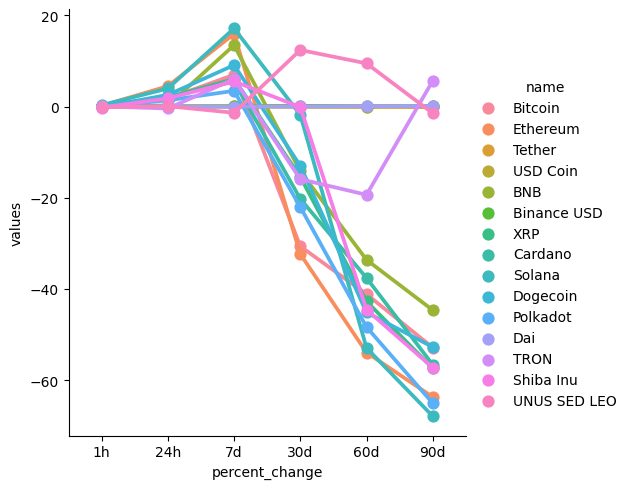

In [47]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [48]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10


,name,quote.USD.price,timestamp
0,Bitcoin,20490.25081,2022-07-07 12:21:10.677808+00:00
0,Bitcoin,20434.00934,NaT
0,Bitcoin,20422.54221,NaT
0,Bitcoin,20422.54221,NaT


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

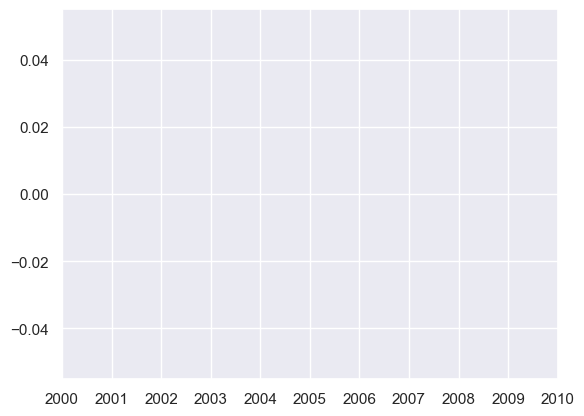

In [49]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)